 ## 6. Geometric Magnitude

In [1]:
from sympy import (
    And,
    fraction,
    Implies,
    Line,
    Or,
    pi,
    Point,
    Ray,
    Segment,
    symbols
)

 Magnitudes can be determined by ixing a line k from point 0 to U (the *unit* magnitude).
 *magnitude* is then any segment 0D from the origin on this line *k*.

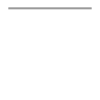

In [2]:
a, b, c, d = symbols("a, b, c, d")

a = 5
b = 1
c = 7
d = 1

O = Point(a, b)
U = Point(c, d)
k = Line(O, U)

OU = Segment(O, U)
OU # the unit magnitude

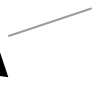

In [3]:
k_pos = Ray(O, k.direction)
k_pos

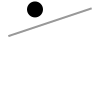

In [4]:
k_neg = Ray(O, k.direction.rotate(pi, O))
k_neg

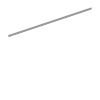

In [5]:
D = k_pos.random_point()
OD = Segment(O, D)
OD

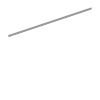

In [6]:
D_prime = k_pos.random_point()
OD_prime = Segment(O, D_prime)
OD_prime

In [7]:
OD.midpoint

Point2D(21739436394564373/9007199254740992, 1241679295027463/9007199254740992)

In [8]:
def is_A_the_greater_magnitude(A, B):
    """
    Determine whether x is a greater magnitude than y.

    A: a segment.
    B: a segment.
    """
    if not(A.p1.equals(B.p1)):
        raise ValueError("The segments do not start from the same origin.")

    if not(B.p2.is_collinear(A.p1, A.p2)):
        raise ValueError("The segments are not on the same line.")

    if A.p1.equals(A.p2):
        raise ValueError("Segment 'A' is not a linear entity.")

    if B.p1.equals(B.p2):
        raise ValueError("Segment 'B' is not a linear entity.")

    A_positive = k_pos.contains(A.p2)
    B_positive = k_pos.contains(B.p2)

    if And(A_positive, not(B_positive)):
        return True

    if And(not(A_positive), B_positive):
        return False

    if And(A_positive, B_positive):
        return And(A.contains(B.p2), not(A.p2.equals(B.p2)))
        
    if And(not(A_positive), not(B_positive)):
        return And(B.contains(A.p2), not(A.p2.equals(B.p2)))


half_OD = Segment(OD.p1, OD.midpoint)
is_A_the_greater_magnitude(OD, half_OD)

True

In [9]:
is_A_the_greater_magnitude(half_OD, OD)

False

In [10]:
is_A_the_greater_magnitude(k_pos, k_neg)

True

In [11]:
is_A_the_greater_magnitude(k_neg, k_pos)

False

In [12]:
def integral_magnitudes(A, n):
    """
    Extend the segment 'A' by 'n' magnitudes.

    A: A segment.
    n: magnitude.
    """
    if not(isinstance(n, int)):
        raise ValueError("'n' must be an integer.")

    if not(n > 0):
        raise ValueError("'n' must be greater than 0.")

    if n == 1:
        return A
    
    x_dist = A.p2.x - A.p1.x
    y_dist = A.p2.y - A.p1.y
    new_p2 = A.p2
    for _ in range(1, n):
        new_p2 = new_p2.translate(x = x_dist, y = y_dist)

    return Segment(A.p1, new_p2)


mag_1 = integral_magnitudes(OD, 1)
mag_1.length.evalf()

5.45268947509253

In [13]:
mag_2 = integral_magnitudes(OD, 2)
mag_2.length.evalf()

10.9053789501851

In [14]:
mag_4 = integral_magnitudes(OD, 4)
mag_4.length.evalf()

21.8107579003701

In [15]:
mag_1.length * 2 == mag_2.length

True

In [16]:
mag_4.length / 2 == mag_2.length

True

In [17]:
def layoff(A: Segment, B: Ray):
    """
    Layoff the Segment 'A' onto a Ray 'B'.

    A: a Segment.
    B: a Ray.
    """
    x_move = B.p1.x - A.p1.x
    y_move = B.p1.y - A.p1.y

    A_prime = Segment(
        A.p1.translate(x_move, y_move),
        A.p2.translate(x_move, y_move)
    )
    ang_change = B.angle_between(A_prime)
    rotated_p2 = A_prime.p2.rotate(ang_change, A_prime.p1)
    A_prime = Segment(A_prime.p1, rotated_p2)
    return A_prime


seg_test = Segment(Point(6, 3), Point(8, 5))
layed_off = layoff(seg_test, k_pos)
seg_test.length.evalf() == layed_off.length.evalf()

True

In [18]:
seg_test.length.evalf()

2.82842712474619

In [19]:
layed_off.length.evalf()

2.82842712474619

In [20]:
def measure_by_magnitude(A: Segment, mag: Segment):
    """
    Measure a Segment by a magnitude.

    A: A Segment.
    mag: a magnitude.
    """
    if Or(not(mag.p1.equals(k_pos.p1)), not(k_pos.contains(mag.p2))):
        raise ValueError("'mag' is not on the positive Ray.")

    layed_off_A = layoff(A, k_pos)

    x_dist = mag.p2.x - mag.p1.x
    y_dist = mag.p2.y - mag.p1.y
    new_p2 = mag.p2
    x = 0
    while (layed_off_A.contains(new_p2)):
        x+=1
        new_p2 = new_p2.translate(x = x_dist, y = y_dist)
    
    remainder = (layed_off_A.length - (x * mag.length)) / mag.length
    return x + remainder


measure_by_magnitude(seg_test, half_OD).evalf()

1.03744294908640

In [21]:
def definition_of_proportion(r1, r2, m, n):
    """
    This definition is originally from Eudoxus.
    
    r1: first ratio.
    r2: second ratio.
    m: a whole number.
    n: a whole number.
    """
    od, ou = fraction(r1)
    ae, av = fraction(r2)

    result = And(
        Implies(m * od > n * ou, m * ae > n * av),
        Implies(m * od < n * ou, m * ae < n * av)
    )

    return result
    

ratio_1 = OD.length / OU.length
ratio_2 = half_OD.length / (OU.length / 2)
definition_of_proportion(ratio_1, ratio_2, 3, 5)

True

In [30]:
ratio_1 = OD.length / OU.length
ratio_3 = half_OD.length / OU.length
definition_of_proportion(ratio_1, ratio_3, 3, 5)

False

In [23]:
def proportion_checker(r1, r2, mx_int):
    """
    Check a large number of whole numbers to see if all proportions are True.
    Returns the x & y whole numbers if it fails.

    r1: a ratio.
    r2: a ratio.
    mx_int: The maximum integer to check for.
    """
    truths = list()
    for x in range(1, mx_int):
        for y in range(1, mx_int):
            result = definition_of_proportion(r1, r2, x, y)
            if not(result):
                print("x: " + str(x) + "; y: " + str(y))
            truths.append(result)

    return all(truths)


proportion_checker(ratio_1, ratio_2, 10)

True

In [29]:
proportion_checker(ratio_1, ratio_3, 10)

x: 1; y: 2
x: 2; y: 3
x: 2; y: 4
x: 2; y: 5
x: 3; y: 5
x: 3; y: 6
x: 3; y: 7
x: 3; y: 8
x: 4; y: 6
x: 4; y: 7
x: 4; y: 8
x: 4; y: 9
x: 5; y: 7
x: 5; y: 8
x: 5; y: 9
x: 6; y: 9


False